# PM2.5 Speciation, lead, and ozone data

In [39]:
import pandas as pd
import numpy as np
import addfips
import seaborn as sns
import matplotlib.pyplot as plt

## data imports

In [2]:
# https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily

#pm2.5 speciation
pm19 = pd.read_csv('data/daily_pm25_2019_FIPS.csv', dtype={'fips':'string'})
pm20 = pd.read_csv('data/daily_pm25_2020_FIPS.csv', dtype={'fips':'string'})
pm21 = pd.read_csv('data/daily_pm25_2021_FIPS.csv', dtype={'fips':'string'})

#ozone
ozone19 = pd.read_csv('data/daily_ozone_2019_FIPS.csv', dtype={'fips':'string'})
ozone20 = pd.read_csv('data/daily_ozone_2020_FIPS.csv', dtype={'fips':'string'})
ozone21 = pd.read_csv('data/daily_ozone_2021_FIPS.csv', dtype={'fips':'string'})

#lead
lead19 = pd.read_csv('data/daily_lead_2019_FIPS.csv', dtype={'fips':'string'})
lead20 = pd.read_csv('data/daily_lead_2020_FIPS.csv', dtype={'fips':'string'})
lead21 = pd.read_csv('data/daily_lead_2021_FIPS.csv', dtype={'fips':'string'})

## quick look

In [3]:
print('2019->', pm19.shape,' 2020-> ',pm20.shape,' 2021-> ',pm21.shape)
print('Columns: ',pm19.columns)
pm19.head(1)

2019-> (540932, 30)  2020->  (554830, 30)  2021->  (55498, 30)
Columns:  Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'fips'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,fips
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-03-10,01003


In [4]:
print('2019-> ', lead19.shape,' 2020-> ',lead20.shape,' 2021-> ',lead21.shape)
print('Columns: ',lead19.columns)
lead19.head(1)

2019->  (12938, 30)  2020->  (10165, 30)  2021->  (442, 30)
Columns:  Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'fips'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,fips
0,1,109,3,14129,1,31.790479,-85.978974,NAD83,Lead (TSP) LC,24 HOUR,...,44,Hi-Vol - Flameless Atomic absorption (GFAA) EP...,TROY LEAD,HENDERSON ROAD,Alabama,Pike,Troy,"Troy, AL",2020-07-01,01109


In [5]:
print('2019-> ',ozone19.shape,' 2020-> ',ozone20.shape,' 2021-> ',ozone21.shape)
print('Columns: ',ozone19.columns)
ozone19.head(1)

2019->  (392252, 30)  2020->  (391923, 30)  2021->  (37694, 30)
Columns:  Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'fips'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,fips
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-02-18,01003


In [7]:
# if you wanted to combine the datasets for and add a year column

#print(spec19.head()); print(spec20.head()); #print(spec21.head())
#spec19.head(2)
#spec19['collection_year'] = 2019;spec20['collection_year'] = 2020;spec21['collection_year'] = 2021
#PM25_speciation = pd.concat([spec19,spec20,spec21], ignore_index=True)
#PM25_speciation.head(2)

## add FIPS codes, not needed

In [8]:
#example
#af = addfips.AddFIPS()
#print(af.get_state_fips('Alabama'))
#01
#print(af.get_county_fips('Jefferson','Alabama'))
#01073

In [9]:
#don't have to run, my intial take

#af = addfips.AddFIPS()
#pm19['fips'] = [af.get_county_fips(row._26,row._25) for row in pm19.itertuples()]
#pm20['FIPS'] = [af.get_county_fips(row._26,row._25) for row in pm20.itertuples()]
#pm21['FIPS'] = [af.get_county_fips(row._26,row._25) for row in pm21.itertuples()]

In [10]:
missingPM = []
for row in pm19.itertuples():
    if row.fips is None:
        missingPM.append((row._26,row._25))
np.unique(missingPM)

array([], dtype=float64)

### actually add fips codes

In [11]:
# alex's function that adds leading zeros based off state and county codes

def FIPS_function(row):
    state = str(row['State Code']).zfill(2)
    county = str(row['County Code']).zfill(3)
    return state + county

In [12]:
pm19['fips'] = pm19.apply(lambda row: FIPS_function(row), axis=1)
pm20['fips'] = pm20.apply(lambda row: FIPS_function(row), axis=1)
pm21['fips'] = pm21.apply(lambda row: FIPS_function(row), axis=1)

In [13]:
missingPM = []
for row in pm19.itertuples():
    if row.fips is None:
        missingPM.append((row._26,row._25))
np.unique(missingPM)

array([], dtype=float64)

In [14]:
lead19['fips'] = lead19.apply(lambda row: FIPS_function(row), axis=1)
lead20['fips'] = lead20.apply(lambda row: FIPS_function(row), axis=1)
lead21['fips'] = lead21.apply(lambda row: FIPS_function(row), axis=1)

ozone19['fips'] = ozone19.apply(lambda row: FIPS_function(row), axis=1)
ozone20['fips'] = ozone20.apply(lambda row: FIPS_function(row), axis=1)
ozone21['fips'] = ozone21.apply(lambda row: FIPS_function(row), axis=1)

In [22]:
print(pm20.shape)
print(pm20.columns)
pm20.describe()

(554830, 30)
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'fips'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,554830.000000,554830.000000,554830.000000,554830.0,554830.000000,554830.000000,554830.000000,554830.000000,554830.000000,554830.000000,554830.000000,554830.000000,311371.000000,315514.000000
mean,28.579713,76.327315,715.522075,88101.0,2.889004,38.583207,-95.968338,10.924660,99.354784,8.159036,11.920215,5.108192,31.297536,191.300532
std,16.298848,91.529639,1560.550584,0.0,1.462509,5.654333,18.347605,11.283628,5.287793,10.625555,18.062643,7.754385,21.303076,53.104830
min,1.000000,1.000000,1.000000,88101.0,1.000000,17.712474,-159.366240,1.000000,4.000000,-5.000000,-5.000000,0.000000,0.000000,116.000000
25%,13.000000,19.000000,7.000000,88101.0,2.000000,35.385574,-111.872222,1.000000,100.000000,4.300000,5.600000,0.000000,18.000000,170.000000
50%,29.000000,53.000000,24.000000,88101.0,3.000000,39.303174,-90.734175,1.000000,100.000000,6.500000,8.700000,0.000000,27.000000,170.000000
75%,42.000000,103.000000,1002.000000,88101.0,3.000000,41.771444,-81.394153,24.000000,100.000000,9.500000,13.700000,9.000000,40.000000,236.000000
max,80.000000,810.000000,9997.000000,88101.0,33.000000,64.845930,-64.784868,24.000000,200.000000,824.104167,1467.200000,23.000000,714.000000,581.000000


In [24]:
print(ozone20.shape)
print(ozone20.columns)
ozone20.describe()

(391923, 30)
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'fips'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,391923.000000,391923.000000,391923.000000,391923.0,391923.000000,391923.000000,391923.000000,391923.000000,391923.000000,391923.000000,391923.000000,391923.000000,391923.000000,0.0
mean,26.483996,75.890323,1366.157115,44201.0,1.082924,37.546248,-95.219228,16.804245,98.861807,0.030817,0.039192,10.699923,37.972296,NaN
std,16.813679,80.157850,2689.605896,0.0,0.343801,4.927375,16.295316,1.212039,7.064231,0.010771,0.012196,3.122617,17.071109,NaN
min,1.000000,1.000000,1.000000,44201.0,1.000000,18.177939,-158.088613,1.000000,6.000000,-0.003300,-0.003000,7.000000,0.000000,NaN
25%,9.000000,21.000000,6.000000,44201.0,1.000000,34.067030,-110.737116,17.000000,100.000000,0.023235,0.031000,9.000000,29.000000,NaN
50%,26.000000,59.000000,25.000000,44201.0,1.000000,38.307030,-91.182016,17.000000,100.000000,0.030706,0.039000,10.000000,36.000000,NaN
75%,41.000000,103.000000,1017.000000,44201.0,1.000000,40.867900,-81.972222,17.000000,100.000000,0.038059,0.046000,11.000000,43.000000,NaN
max,80.000000,800.000000,9997.000000,44201.0,6.000000,64.845690,-65.915482,17.000000,100.000000,0.135529,0.183000,23.000000,282.000000,NaN


In [23]:
print(lead20.shape)
print(lead20.columns)
lead20.describe()

(10165, 30)
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'fips'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000,10165.0,10165.0,10165.000000,10165.000000,10165.0,0.0,10165.000000
mean,28.099262,96.809739,1211.287654,14140.938121,1.604820,37.713897,-91.404614,1.0,100.0,0.022982,0.022982,0.0,NaN,269.066011
std,13.682817,93.455869,2575.683234,3189.803646,1.316859,3.778858,12.367340,0.0,0.0,0.057711,0.057711,0.0,NaN,236.800855
min,1.000000,3.000000,1.000000,12128.000000,1.000000,18.453389,-122.399044,1.0,100.0,0.000000,0.000000,0.0,NaN,43.000000
25%,18.000000,37.000000,14.000000,14129.000000,1.000000,34.164160,-94.824900,1.0,100.0,0.003000,0.003000,0.0,NaN,189.000000
50%,29.000000,93.000000,27.000000,14129.000000,1.000000,38.262160,-90.379930,1.0,100.0,0.007000,0.007000,0.0,NaN,192.000000
75%,40.000000,115.000000,1023.000000,14129.000000,2.000000,40.631545,-82.450080,1.0,100.0,0.019000,0.019000,0.0,NaN,193.000000
max,72.000000,810.000000,9008.000000,85129.000000,9.000000,45.137680,-66.694987,1.0,100.0,1.202000,1.202000,0.0,NaN,813.000000


In [ ]:
#mising values

In [25]:
pm20.isnull().sum()

State Code                  0
County Code                 0
Site Num                    0
Parameter Code              0
POC                         0
Latitude                    0
Longitude                   0
Datum                       0
Parameter Name              0
Sample Duration             0
Pollutant Standard     243459
Date Local                  0
Units of Measure            0
Event Type                  0
Observation Count           0
Observation Percent         0
Arithmetic Mean             0
1st Max Value               0
1st Max Hour                0
AQI                    243459
Method Code            239316
Method Name                 0
Local Site Name         29791
Address                   265
State Name                  0
County Name                 0
City Name                   0
CBSA Name               43876
Date of Last Change         0
fips                        0
dtype: int64

In [26]:
ozone20.isnull().sum()

State Code                  0
County Code                 0
Site Num                    0
Parameter Code              0
POC                         0
Latitude                    0
Longitude                   0
Datum                       0
Parameter Name              0
Sample Duration             0
Pollutant Standard          0
Date Local                  0
Units of Measure            0
Event Type                  0
Observation Count           0
Observation Percent         0
Arithmetic Mean             0
1st Max Value               0
1st Max Hour                0
AQI                         0
Method Code            391923
Method Name                 0
Local Site Name         19612
Address                   132
State Name                  0
County Name                 0
City Name                   0
CBSA Name               40854
Date of Last Change         0
fips                        0
dtype: int64

In [27]:
lead20.isnull().sum()

State Code                 0
County Code                0
Site Num                   0
Parameter Code             0
POC                        0
Latitude                   0
Longitude                  0
Datum                      0
Parameter Name             0
Sample Duration            0
Pollutant Standard         0
Date Local                 0
Units of Measure           0
Event Type                 0
Observation Count          0
Observation Percent        0
Arithmetic Mean            0
1st Max Value              0
1st Max Hour               0
AQI                    10165
Method Code                0
Method Name                0
Local Site Name         1375
Address                    0
State Name                 0
County Name                0
City Name                  0
CBSA Name               1004
Date of Last Change        0
fips                       0
dtype: int64

In [33]:
print(pm20['AQI'].describe())
pm20['Arithmetic Mean'].describe()

count    311371.000000
mean         31.297536
std          21.303076
min           0.000000
25%          18.000000
50%          27.000000
75%          40.000000
max         714.000000
Name: AQI, dtype: float64


count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

In [34]:
print(ozone20['AQI'].describe())
ozone20['Arithmetic Mean'].describe()

count    391923.000000
mean         37.972296
std          17.071109
min           0.000000
25%          29.000000
50%          36.000000
75%          43.000000
max         282.000000
Name: AQI, dtype: float64


count    391923.000000
mean          0.030817
std           0.010771
min          -0.003300
25%           0.023235
50%           0.030706
75%           0.038059
max           0.135529
Name: Arithmetic Mean, dtype: float64

In [36]:
print(lead20['AQI'].describe())
lead20['Arithmetic Mean'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: AQI, dtype: float64


count    10165.000000
mean         0.022982
std          0.057711
min          0.000000
25%          0.003000
50%          0.007000
75%          0.019000
max          1.202000
Name: Arithmetic Mean, dtype: float64

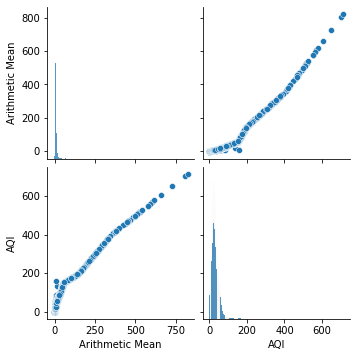

In [40]:
sns.pairplot(data = pm20, vars=['Arithmetic Mean','AQI'])
plt.show()

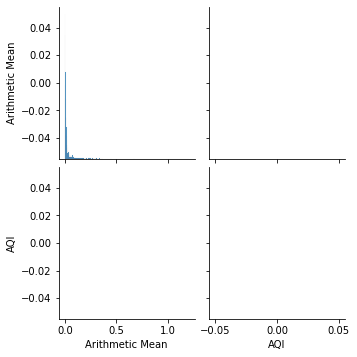

In [41]:
sns.pairplot(data = lead20, vars=['Arithmetic Mean','AQI'])
plt.show()